Tianzhe Wang

By 20% decreases in the threshold between urban and rural:
block groups that have a population density of at least 800 people per square mile

In [2]:
import sys
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.3\\bin')
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.3\\arcpy')
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.3\\ArcToolbox\\Scripts')
import arcpy 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

fc = "C:\\Users\\wangtz\\Documents\\458\\1_25_inClass\\individual\\saep_bg10.shp"

arcpy.AddField_management(fc, "Pop_Dens","float")   # 2016 population density
arcpy.AddField_management(fc, "Type","text")         # Type: urban/rural

arcpy.AddField_management(fc, "Tp16_v2","text")         # Type: urban/rural
arcpy.AddField_management(fc, "Chg06_v2","text")    # Change in category:urbanized, deurbanized, unchange


<Result 'C:\\Users\\wangtz\\Documents\\458\\1_25_inClass\\individual\\saep_bg10.shp'>

This cell is to look through fields and data

In [7]:
# print "Fields in the file: " + fc
# fieldlist = arcpy.ListFields(fc)
# for curr_field in fieldlist:
#     print curr_field.name
    
# bgrows = arcpy.SearchCursor(fc)
# for row in bgrows:
#     print row.getValue("Pop_Dens")

Variable sets and calculations:

In [3]:
# For 2016: Population density, Total urban/rual area, Total number of urban/rural block groups
urbanCount_2016 = 0
ruralCount_2016 = 0
urbanPop_2016 = 0
urbanLand_2016 = 0

# Total population in both years, total number of block groups, total land area
totalPop_2016 = 0
totalBg = 0
totalLand = 0

# Use update cursor
cursor = arcpy.da.UpdateCursor(fc,["Pop_Dens", "ALANDMI", "POP2016", "Type"])

for rows in cursor:
    # filter out block groups of 0 sqmi. of land (all of which are water area)
    if rows[1] == 0:
        rows[0] = 0 
    else:
        rows[0] = rows[2] / rows[1]   # 2016 pop density
    # classify urban area, 2016
    if rows[0] >= 1000:
        rows[3] = "Urban"
        urbanCount_2016 += 1
        urbanPop_2016 += rows[2]
        urbanLand_2016 += rows[1]       
    else:
        rows[3] = "Rural"
        ruralCount_2016 += 1
        
    totalBg += 1
    totalLand += rows[1] 
    totalPop_2016 += rows[2]
    
    #print rows[3]    
    cursor.updateRow(rows)
    
del cursor

In [4]:
# For 2016 - 800 people: Population density, Total urban/rual area, Total number of urban/rural block groups
urbanCount_2016_v2 = 0
ruralCount_2016_v2 = 0
urbanPop_2016_v2 = 0
urbanLand_2016_v2 = 0

In [5]:
cursor = arcpy.da.UpdateCursor(fc,["Pop_Dens", "ALANDMI", "POP2016", "Tp16_v2"])

for rows in cursor:
    if rows[0] >= 800:
        rows[3] = "Urban"
        urbanCount_2016_v2 += 1
        urbanPop_2016_v2 += rows[2]
        urbanLand_2016_v2 += rows[1]       
    else:
        rows[3] = "Rural"
        ruralCount_2016_v2 += 1  
    #print rows[3]    
    cursor.updateRow(rows)
    
del cursor

In [63]:
# Write code that calculates and prints out to the screen what percentage of the population
# of the state is urbanized in 2016
print 'Urban Area -  1000 peeple/sq mi'
print 'In 2016, urban population is {}, which is {:.2%} of state population.'.format(int(urbanPop_2016), urbanPop_2016/totalPop_2016)
print 'In 2016, urban land is {} sqmi, which is {:.2%} of state area.'.format(urbanLand_2016, urbanLand_2016/totalLand) 
print 'Number of urban block groups is {}'.format(urbanCount_2016) 
print 'Number of rural block groups {}'.format(ruralCount_2016)
print ''

print 'Urban Area -  800 peeple/sq mi'
print 'In 2016, urban population is {}, which is {:.2%} of state population.'.format(int(urbanPop_2016_v2), urbanPop_2016_v2/totalPop_2016)
print 'In 2016, urban land is {} sqmi, which is {:.2%} of state area.'.format(urbanLand_2016_v2, urbanLand_2016_v2/totalLand) 
print 'Number of urban block groups is {}'.format(urbanCount_2016_v2) 
print 'Number of rural block groups {}'.format(ruralCount_2016_v2)
print ''

pcNum = float(urbanCount_2016_v2) / urbanCount_2016 - 1
pcPop = urbanPop_2016_v2/urbanPop_2016 - 1
print 'The numbers of urban block groups have increased by {:.2%}'.format(pcNum)
print 'Urban population of the state have increased by {:.2%}'.format(pcPop)


Urban Area -  1000 peeple/sq mi
In 2016, urban population is 5225246, which is 72.74% of state population.
In 2016, urban land is 1491.117 sqmi, which is 2.24% of state area.
Number of urban block groups is 3415
Number of rural block groups 1368

Urban Area -  800 peeple/sq mi
In 2016, urban population is 5404828, which is 75.24% of state population.
In 2016, urban land is 1691.567 sqmi, which is 2.55% of state area.
Number of urban block groups is 3523
Number of rural block groups 1260

The numbers of urban block groups have increased by 3.16%
Urban population of the state have increased by 3.44%


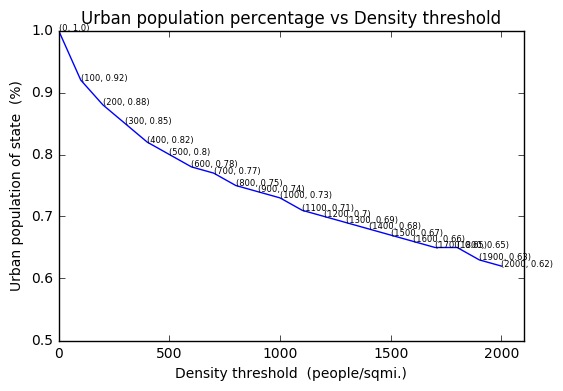

In [11]:
# a list of densities
limit = 2100
density = [i for i in range(0,limit,100)]
# print density

points = []
percentage = []
for d in density:
    cursor = arcpy.da.SearchCursor(fc,["Pop_Dens", "POP2016"])
    urbanPop = 0
    totalPop = 0
    for rows in cursor:
        if rows[0] >= d:
            urbanPop += rows[1]  
        totalPop += rows[1]
    pct = round(urbanPop / totalPop, 2)
    point = {d:pct}   
    points.append(point)
    percentage.append(point[d])
# print points
# print percentage

plt.plot(density, percentage, linewidth=1.0)
plt.axis([0, limit, 0.5, 1])
plt.xlabel('Density threshold  (people/sqmi.)')
plt.ylabel('Urban population of state  (%)')
plt.title('Urban population percentage vs Density threshold')

# This is to show point label seperatedly. 
# d1 = density[0::2]
# p1 = percentage[0::2]
# d2 = density[1::2]
# p2 = percentage[1::2] 
# print d1, p1, d2, p2

for xy in zip(density, percentage):                                       
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data', fontsize=6)

plt.show()


As the density threshold increase, urban population percentages decrease very slowly. It indicates that a majority of poeple of WA state live in very high denisty areas. Even when the threshold is raised to 2000 people/sqmi, more than 60% of state population are still categorized as urban population. 